**FOOD DETECTION USING KERAS (ATTEMPT - 1)**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary header files

In [0]:
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model

Using TensorFlow backend.


Reading image file names

In [0]:
imgs_path=[]
with open("drive//My Drive//food images//images.txt",'r') as f:
  for i in f.readlines():
    imgs_path.append(i[:-1])
print(imgs_path,len(imgs_path))

['1.jpg', '9.jpg', '14.jpg', '19.jpg', '22.jpg', '25.jpg', '27.jpg', '28.jpg', '30.jpg', '31.jpg', '33.jpg', '37.jpg', '38.jpg', '58.jpg', '59.jpg', '61.jpg', '62.jpg', '72.jpg', '81.jpg', '87.jpg', '88.jpg', '89.jpg', '91.jpg', '92.jpg', '97.jpg', '4004.jpg', '4294.jpg', '4300.jpg', '4305.jpg', '4316.jpg', '4323.jpg', '4331.jpg', '4337.jpg', '4520.jpg', '4605.jpg', '4930.jpg', '4931.jpg', '4934.jpg', '4936.jpg', '4938.jpg', '4953.jpg', '4955.jpg', '4956.jpg', '4958.jpg', '4972.jpg', '4985.jpg', '4988.jpg', '5013.jpg', '5044.jpg', '5073.jpg', '5074.jpg', '5075.jpg', '5077.jpg', '5087.jpg', '5101.jpg', '5106.jpg', '5109.jpg', '5115.jpg', '5127.jpg', '5142.jpg', '5149.jpg', '5158.jpg', '5169.jpg', '5170.jpg', '5180.jpg', '5245.jpg', '5512.jpg', '6476.jpg', '6910.jpg', '6974.jpg', '7037.jpg', '7046.jpg', '7054.jpg', '7077.jpg', '7145.jpg', '7263.jpg', '7293.jpg', '7321.jpg', '7337.jpg', '10617.jpg', '10910.jpg', '11064.jpg', '11156.jpg', '11161.jpg', '11167.jpg', '11180.jpg', '11184.jpg',

Reading the different food categories

In [0]:
class_names=open("drive//My Drive//food images//classes.txt",'r').readlines()
class_names=[class_names[i][:-1] for i in range(len(class_names))]
print(class_names)
print(len(class_names))

['rice', 'eels', 'pilaf', "chicken-'n'-egg", 'pork', 'beef', 'sushi', 'chicken', 'fried', 'tempura', 'bibimbap', 'toast', 'croissant', 'roll', 'raisin', 'chip', 'hamburger', 'pizza', 'sandwiches', 'udon', 'tempura', 'soba', 'ramen', 'beef', 'tensin', 'fried', 'spaghetti', 'Japanese-style', 'takoyaki', 'gratin', 'sauteed', 'croquette', 'grilled', 'sauteed', 'vegetable', 'miso', 'potage', 'sausage', 'oden', 'omelet', 'ganmodoki', 'jiaozi', 'stew', 'teriyaki', 'fried', 'grilled', 'salmon', 'sashimi', 'grilled', 'sukiyaki', 'sweet', 'lightly', 'steamed', 'tempura', 'fried', 'sirloin', 'nanbanzuke', 'boiled', 'seasoned', 'hambarg', 'beef', 'dried', 'ginger', 'spicy', 'yakitori', 'cabbage', 'rolled', 'egg', 'fermented', 'cold', 'egg', 'chilled', 'stir-fried', 'simmered', 'boiled', 'sashimi', 'sushi', 'fish-shaped', 'shrimp', 'roast', 'steamed', 'omelet', 'cutlet', 'spaghetti', 'fried', 'potato', 'green', 'macaroni', 'Japanese', 'pork', 'chinese', 'beef', 'kinpira-style', 'rice', 'pizza', 'di

Reading the dataset of images

In [0]:
imgs=[]
for i in imgs_path:
  print(i)
  imgs.append(cv2.imread("drive//My Drive//food images//"+i))
imgs=np.array(imgs)
print(imgs.shape)

1.jpg
9.jpg
14.jpg
19.jpg
22.jpg
25.jpg
27.jpg
28.jpg
30.jpg
31.jpg
33.jpg
37.jpg
38.jpg
58.jpg
59.jpg
61.jpg
62.jpg
72.jpg
81.jpg
87.jpg
88.jpg
89.jpg
91.jpg
92.jpg
97.jpg
4004.jpg
4294.jpg
4300.jpg
4305.jpg
4316.jpg
4323.jpg
4331.jpg
4337.jpg
4520.jpg
4605.jpg
4930.jpg
4931.jpg
4934.jpg
4936.jpg
4938.jpg
4953.jpg
4955.jpg
4956.jpg
4958.jpg
4972.jpg
4985.jpg
4988.jpg
5013.jpg
5044.jpg
5073.jpg
5074.jpg
5075.jpg
5077.jpg
5087.jpg
5101.jpg
5106.jpg
5109.jpg
5115.jpg
5127.jpg
5142.jpg
5149.jpg
5158.jpg
5169.jpg
5170.jpg
5180.jpg
5245.jpg
5512.jpg
6476.jpg
6910.jpg
6974.jpg
7037.jpg
7046.jpg
7054.jpg
7077.jpg
7145.jpg
7263.jpg
7293.jpg
7321.jpg
7337.jpg
10617.jpg
10910.jpg
11064.jpg
11156.jpg
11161.jpg
11167.jpg
11180.jpg
11184.jpg
11186.jpg
11197.jpg
11200.jpg
11292.jpg
11317.jpg
11326.jpg
11337.jpg
11352.jpg
11459.jpg
11568.jpg
11573.jpg
11575.jpg
11576.jpg
11577.jpg
11590.jpg
11593.jpg
11597.jpg
11608.jpg
11649.jpg
11650.jpg
11686.jpg
11689.jpg
11694.jpg
11732.jpg
11737.jpg
11774.jpg
1

Reading the bounding box informations

In [0]:
bb=[]
with open("drive//My Drive//food images//bb_inf.txt",'r') as f:
  for i in f.readlines():
    print(eval(i)[0])
    bb.append(eval(i))

1
9
14
19
22
25
27
28
30
31
33
37
38
58
59
61
62
72
81
87
88
89
91
92
97
4004
4294
4300
4305
4316
4323
4331
4337
4520
4605
4930
4931
4934
4936
4938
4953
4955
4956
4958
4972
4985
4988
5013
5044
5073
5074
5075
5077
5087
5101
5106
5109
5115
5127
5142
5149
5158
5169
5170
5180
5245
5512
6476
6910
6974
7037
7046
7054
7077
7145
7263
7293
7321
7337
10617
10910
11064
11156
11161
11167
11180
11184
11186
11197
11200
11292
11317
11326
11337
11352
11459
11568
11573
11575
11576
11577
11590
11593
11597
11608
11649
11650
11686
11689
11694
11732
11737
11774
11862
11956
11962
11990
11997
12079
12081
12082
12084
12086
12095
12098
12108
12169
12171
12184
12209
12245
12923
13164
13182
13233
13236
13262
13264
13273
13276
13295
13297
13325
13327
13329
13331
13333
13379
13389
13414
13468
13639
13645
13646
13671
13690
13693
13695
13696
13701
13702
13704
13705
13708
13723
13724
13731
13732
13733
13734
13735
13736
13739
13745
13746
13747
13748
13749
13752
13754
13755
13757
13763
13764
13774
13775
13776
13779
137

Defining a function to plot the image along with the boudning box

In [0]:
def plot_bb(img, box):
  fig,ax=plt.subplots(1)
  ax.imshow(img)
  for b in box:
    x=b[1]-b[3]/2
    x/=800
    x*=512
    y=b[2]-b[4]/2
    y/=600
    y*=512
    lab=class_names[int(b[0])-1]
    w=b[3]*512/800
    h=b[4]*512/600
    bb=patches.Rectangle((x,y),w,h,edgecolor='b',fill=False)
    ax.add_patch(bb)
    plt.text(x,y,lab,fontsize=15,color='b')
  plt.show()

Plotting samples

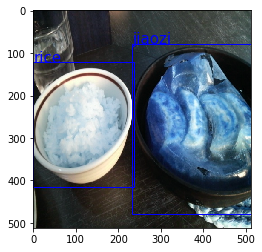

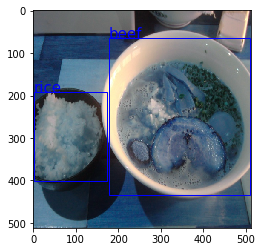

In [0]:
plot_bb(imgs[0],bb[0][1])
plot_bb(imgs[1],bb[1][1])

In this attempt the intuitive idea behind **YOLO** algorithm was considered for building the keras model. According to this, images are treated as grid of patches where each patch is checked of having the mid point of the bounding boxes. 
Each grid is represented by a vector containing the objectness score, box coordinates, width, height and number of classes. In this study, the image is divided as 12 x 12 patches with each patch represented by a vector of size 105.


This attempt was where instead of using a pretrained model a keras model was trained from scratch.

The bounding box information read was proceesed to fit the resized image and stored in the required order.

In [0]:
y=np.zeros((len(bb),12,12,105))
#print(y[0:][0:][0:])
t=512//12
for i in range(len(bb)):
  box=bb[i][1]
  #y1=np.zeros((10,10,105))
  for b in box:
    lab=int(b[0])-1
    x1=b[1]
    y1=b[2]
    w=b[3]
    h=b[4]
    x2=x1*512/800
    y2=y1*512/600
    j1=int(x2//t)
    i1=int(11-y2//t)
    y[i,i1,j1,0]=1
    y[i,i1,j1,1]=x1/800
    y[i,i1,j1,2]=y1/600
    y[i,i1,j1,3]=w
    y[i,i1,j1,4]=h
    y[i,i1,j1,lab]=1
  print(i,i1,j1)
#y=np.array(y)
print(y.shape)
print(y)

0 5 8
1 6 8
2 3 5
3 7 3
4 10 4
5 4 1
6 8 2
7 9 4
8 10 5
9 9 1
10 10 1
11 9 1
12 5 3
13 5 7
14 8 4
15 8 5
16 10 4
17 6 5
18 6 7
19 5 7
20 7 8
21 8 3
22 4 9
23 3 9
24 3 9
25 11 0
26 10 2
27 11 1
28 11 2
29 10 3
30 9 2
31 9 4
32 10 4
33 10 1
34 10 2
35 8 3
36 4 3
37 9 2
38 8 2
39 9 2
40 8 5
41 9 1
42 7 3
43 10 4
44 8 3
45 7 3
46 8 7
47 10 7
48 5 6
49 10 2
50 5 2
51 10 4
52 10 1
53 8 1
54 9 2
55 11 1
56 6 8
57 7 8
58 10 2
59 2 2
60 11 4
61 8 5
62 8 5
63 8 3
64 10 6
65 10 0
66 8 3
67 7 5
68 7 6
69 9 2
70 7 3
71 9 1
72 9 6
73 10 6
74 4 6
75 6 10
76 10 6
77 4 6
78 10 3
79 8 3
80 6 2
81 7 6
82 7 4
83 6 5
84 7 1
85 6 6
86 7 5
87 9 6
88 6 2
89 7 6
90 4 2
91 9 3
92 8 3
93 9 1
94 9 3
95 7 5
96 9 4
97 7 4
98 9 5
99 7 5
100 7 4
101 8 3
102 9 4
103 9 1
104 10 5
105 7 3
106 7 6
107 7 8
108 8 8
109 7 8
110 9 2
111 9 1
112 5 5
113 9 6
114 7 5
115 8 3
116 7 5
117 10 2
118 4 9
119 4 9
120 4 9
121 4 9
122 3 9
123 6 4
124 7 5
125 8 1
126 10 1
127 3 9
128 6 8
129 5 6
130 7 5
131 9 5
132 7 2
133 10 3
134 11 3

The data is scaled to normalize it and split into train and test sets.

In [0]:
X_train,X_test,y_train,y_test=train_test_split(imgs,y,test_size=0.2)
sc={}
t=0
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[3]):
    sc[t]=StandardScaler()
    X_train[i,:,:,j]=sc[t].fit_transform(X_train[i,:,:,j])
    t+=1
k=0
for i in range(X_test.shape[0]):
  for j in range(X_test.shape[3]):
    X_test[i,:,:,j]=sc[k].transform(X_test[i,:,:,j])
    k+=1
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(939, 512, 512, 3) (939, 12, 12, 105)
(235, 512, 512, 3) (235, 12, 12, 105)


A **CNN** based model is defined which generates an output of 12 x 12 x 105.

In [0]:
classifier = Sequential()

classifier.add(Conv2D(128, (10, 10), input_shape = (512, 512, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (8, 8), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

#classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (4, 4), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

#classifier.add(BatchNormalization())

classifier.add(Conv2D(15, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(105, (2, 2), activation = 'relu'))

#classifier.summary()


The model is trained using **Adam** optimizer for 100 epochs with a batch size of 16.

In [0]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

his=classifier.fit(X_train,y_train,epochs=100,batch_size=16)

W0714 06:36:47.028519 140171277952896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 06:36:47.168013 140171277952896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0714 06:36:47.324830 140171277952896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
939/939 [==============================] - 71s 76ms/step - loss: 21.6671 - acc: 0.0054
Epoch 2/100
939/939 [==============================] - 58s 62ms/step - loss: 16.3031 - acc: 0.0091
Epoch 3/100
939/939 [==============================] - 58s 61ms/step - loss: 16.2039 - acc: 0.0112
Epoch 4/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1769 - acc: 0.0118
Epoch 5/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1687 - acc: 0.0118
Epoch 6/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1621 - acc: 0.0118
Epoch 7/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1571 - acc: 0.0119
Epoch 8/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1541 - acc: 0.0119
Epoch 9/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1497 - acc: 0.0119
Epoch 10/100
939/939 [==============================] - 58s 62ms/step - loss: 16.1472 - acc: 0.0120
Epoch 11/

The test data was given for prediction and it was found that the model did not learn properly as the the predicted output contained only zeros.

In [0]:
y_pred=classifier.predict(X_test)
print(sum(sum(y_pred)))
#print(sum(y_test))
#print(sum(y_pred-y_test))

[[3.1881437 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [1.0667173 0.        0.        ... 0.        1.1000587 0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [3.3336651 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [0]:
pred=np.zeros(y_pred.shape)
c=0
for i in range(len(y_pred)):
  for j in range(12):
    for k in range(12):
      if y_pred[i,j,k,0]>0:
        c+=1
        p=y_pred[i,j,k]
        v=np.zeros(105)
        lab=np.argmax(p[5:])
        v[lab]=1
        v[0]=1
        v[1]=p[1]*800
        v[2]=p[2]*600
        v[3]=p[3]
        v[4]=p[4]
        pred[i,j,k]=v
print(y_pred)
print(c)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 